In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tftb.generators import noisecu
from scipy import signal

def simple_sin(frequency, amplitude, phase, time):
    #time = np.linspace(0, 2 * np.pi, time_points)
    time_series = np.sin((time) * 2 * np.pi * frequency + phase) * amplitude
    return time, time_series

def chirp(init_freq, chirp_rate, amplitude, time):
    #time = np.linspace(0, 1, time_points)
    time_series = signal.chirp(time, init_freq, 1, chirp_rate) * amplitude
    return time, time_series

In [17]:
# Sampling
fs = 10e3
T = 1/float(Fs)
N = 1e5

f1 = 20
a1 = 20
phase = 0

f2 = 0
rate = 2
a2 = 20


time_points = np.arange(N)/float(fs)

input_signals = []

_, time_series1 = simple_sin(f1, a1, phase, time_points)
_, time_series2 = chirp(f2, rate, a2, time_points)
time_series = np.array(time_series1) + np.array(time_series2)

print(len(time_series))

"""
# Analytic complex uniform white noise.
noise = noisecu(L)

S = s1 + s2 + s3 + s4 + s5# + np.absolute(noise)

plt.figure(1)
plt.suptitle("Signals")

plt.subplot(7,1,6)
plt.ylabel("3 Hz")
plt.plot(s1)

plt.subplot(7,1,5)
plt.ylabel("7 Hz")
plt.plot(s2)

plt.subplot(7,1,4)
plt.ylabel("12 Hz")
plt.plot(s3)

plt.subplot(7,1,3)
plt.ylabel("15 Hz")
plt.plot(s4)

plt.subplot(7,1,2)
plt.ylabel("18 Hz")
plt.plot(s5)

plt.subplot(7,1,1)
plt.ylabel("Noise")
plt.plot(noise)

plt.subplot(7,1,7)
plt.ylabel("Sum")
plt.plot(S)
"""

100000


'\n# Analytic complex uniform white noise.\nnoise = noisecu(L)\n\nS = s1 + s2 + s3 + s4 + s5# + np.absolute(noise)\n\nplt.figure(1)\nplt.suptitle("Signals")\n\nplt.subplot(7,1,6)\nplt.ylabel("3 Hz")\nplt.plot(s1)\n\nplt.subplot(7,1,5)\nplt.ylabel("7 Hz")\nplt.plot(s2)\n\nplt.subplot(7,1,4)\nplt.ylabel("12 Hz")\nplt.plot(s3)\n\nplt.subplot(7,1,3)\nplt.ylabel("15 Hz")\nplt.plot(s4)\n\nplt.subplot(7,1,2)\nplt.ylabel("18 Hz")\nplt.plot(s5)\n\nplt.subplot(7,1,1)\nplt.ylabel("Noise")\nplt.plot(noise)\n\nplt.subplot(7,1,7)\nplt.ylabel("Sum")\nplt.plot(S)\n'

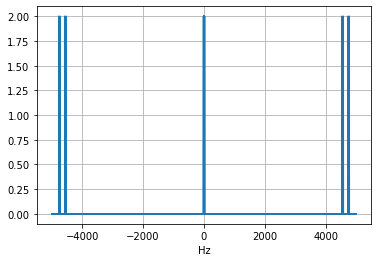

In [26]:
# FFT
result = np.fft.fft(time_series)

freq = np.fft.fftfreq(int(N), 1/float(fs))


plt.figure(2)
plt.grid()
plt.xlabel("Hz")
plt.plot(freq[0:int(N)//2], 2*np.absolute(result//int(N))[0:int(N)//2])
#plt.plot(freq, 2*np.absolute(result))

<IPython.core.display.Javascript object>


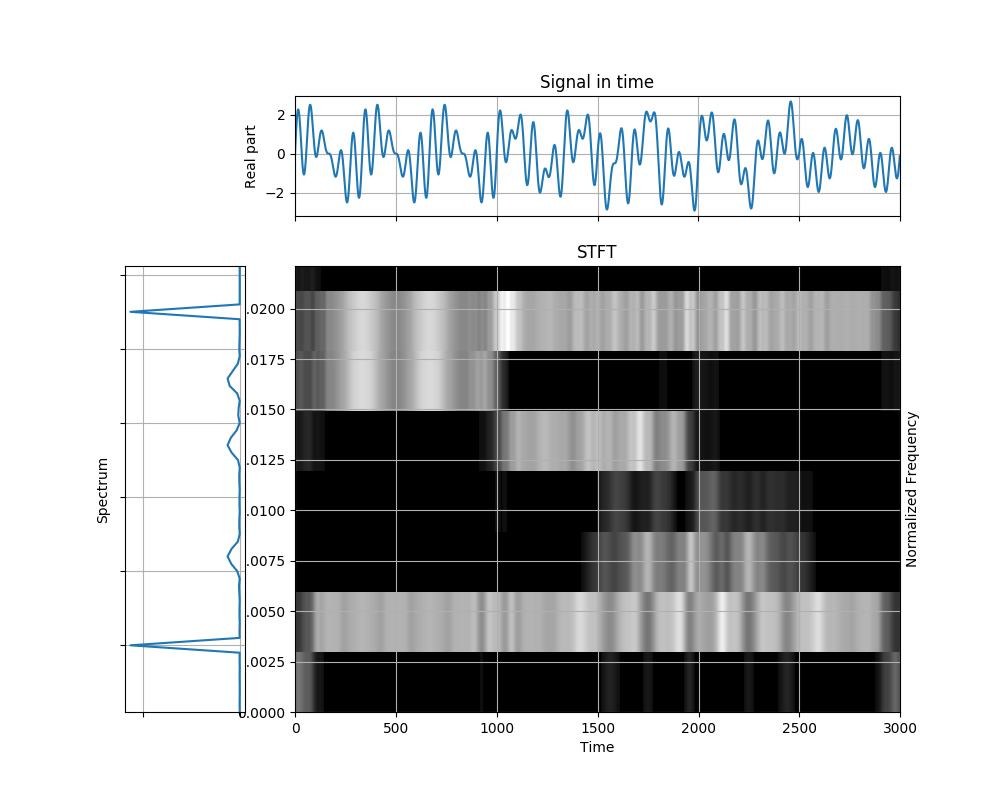

In [5]:
# Short-time Fourier Transform
from scipy.signal import hamming
from tftb.processing.linear import ShortTimeFourierTransform


Nx = len(S)
nsc = int(np.floor(Nx/4.5))
window = hamming(nsc)
nov = int(np.floor(nsc/2))

stft = ShortTimeFourierTransform(S, n_fbins=nov, fwindow=window)
stft.run()
stft.plot(show_tf=True, cmap=plt.cm.gray)

<IPython.core.display.Javascript object>


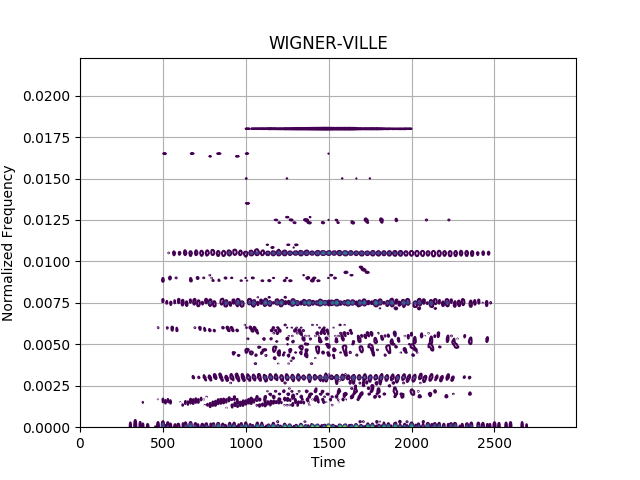

In [6]:
# Wigner-Ville Distribution
from tftb.processing.cohen import WignerVilleDistribution
wvd = WignerVilleDistribution(S)
wvd.run()
wvd.plot(kind='contour')

<IPython.core.display.Javascript object>


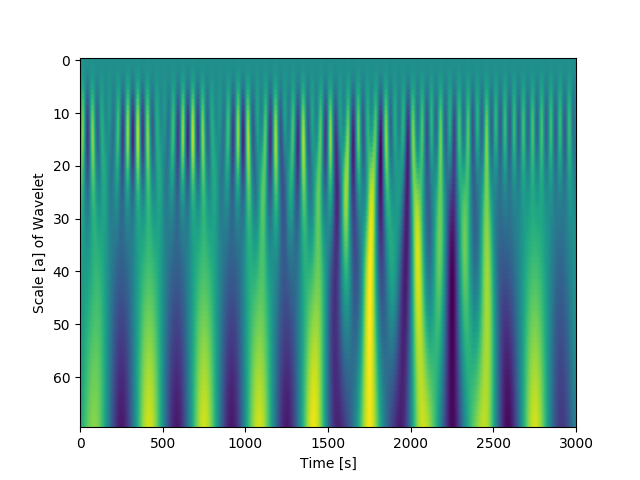

In [7]:
# Continous Wavelet Transform
from scipy.signal import cwt, ricker
widths = np.arange(1, 71)
cwtmatr = cwt(S, ricker, widths) # ricker is mexican hat wavelet
plt.figure(5)
plt.xlabel("Time [s]")
plt.ylabel("Scale [a] of Wavelet")
plt.imshow(cwtmatr, aspect='auto')

<IPython.core.display.Javascript object>


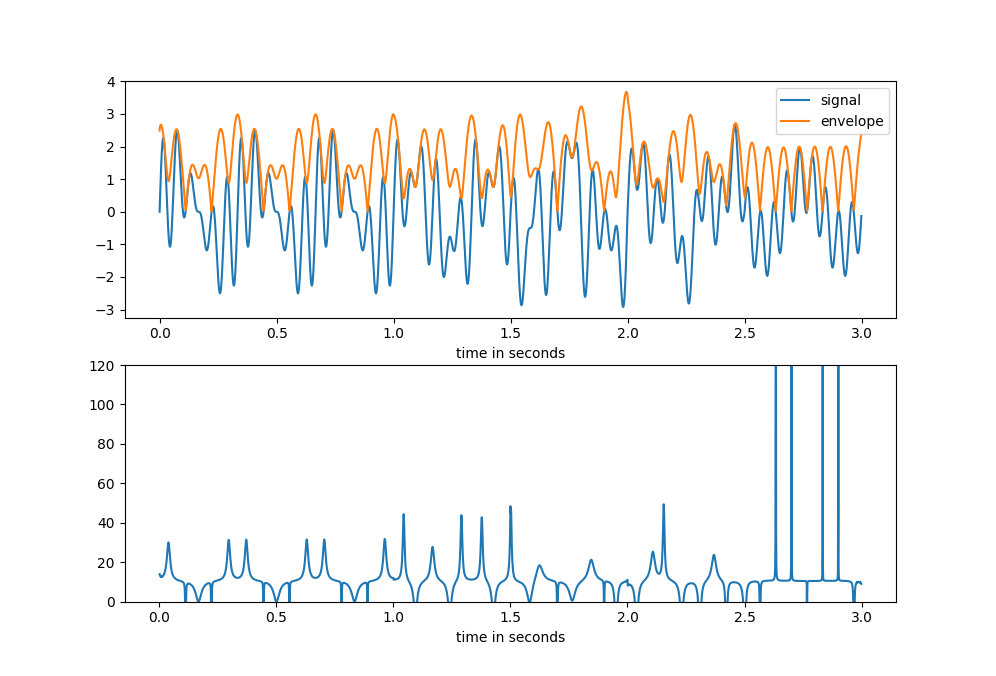

(0.0, 120.0)

In [8]:
# Hilbert Transform
# from https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.signal.hilbert.html
from scipy.signal import hilbert

analytic_signal = hilbert(S)
amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * Fs)

fig = plt.figure(6)
ax0 = fig.add_subplot(211)
ax0.plot(t, S, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)